In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
df = pd.read_csv('crypto.csv', header=[0, 1], index_col=0, parse_dates=[0])
df.head()

Price          close                                                   \
Ticker           ada          btc      doge         eth sol       xrp   
Date                                                                    
2020-01-01  0.033458  7200.174316  0.002033  130.802002 NaN  0.192667   
2020-01-02  0.032751  6985.470215  0.002009  127.410179 NaN  0.188043   
2020-01-03  0.034180  7344.884277  0.002145  134.171707 NaN  0.193521   
2020-01-04  0.034595  7410.656738  0.002241  135.069366 NaN  0.194355   
2020-01-05  0.034721  7411.317383  0.002419  136.276779 NaN  0.195537   

Price           High                                     ...      Open  \
Ticker           ada          btc      doge         eth  ...      doge   
Date                                                     ...             
2020-01-01  0.033813  7254.330566  0.002052  132.835358  ...  0.002028   
2020-01-02  0.033507  7212.155273  0.002110  130.820038  ...  0.002034   
2020-01-03  0.034427  7413.715332  0.002177  134.554016  ...  0.002008   
2020-01-04  0.034685  7427.385742  0.002490  136.052719  ...  0.002144   
2020-01-05  0.035356  7544.497070  0.002491  139.410202  ...  0.002240   

Price                                   volume                         \
Ticker             eth sol       xrp       ada          btc      doge   
Date                                                                    
2020-01-01  129.630661 NaN  0.192912  22948374  18565664997  51180941   
2020-01-02  130.820038 NaN  0.192708  20843934  20802083465  65071106   
2020-01-03  127.411263 NaN  0.187948  30162644  28111481032  62619988   
2020-01-04  134.168518 NaN  0.193521  29535781  18444271275  94227582   
2020-01-05  135.072098 NaN  0.194367  21479178  19725074095  52631740   

Price                                    
Ticker              eth sol         xrp  
Date                                     
2020-01-01   7935230330 NaN  1041134003  
2020-01-02   8032709256 NaN  1085351426  
2020-01-03  10476845358 NaN  1270017043  
2020-01-04   7430904515 NaN   999331594  
2020-01-05   7526675353 NaN  1168067557  

[5 rows x 30 columns]

In [3]:
df.columns = ['_'.join(col).strip() for col in df.columns]
df.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,High_ada,High_btc,High_doge,High_eth,...,Open_doge,Open_eth,Open_sol,Open_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,0.033813,7254.330566,0.002052,132.835358,...,0.002028,129.630661,NaN,0.192912,22948374,18565664997,51180941,7935230330,NaN,1041134003
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,0.033507,7212.155273,0.002110,130.820038,...,0.002034,130.820038,NaN,0.192708,20843934,20802083465,65071106,8032709256,NaN,1085351426
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,0.034427,7413.715332,0.002177,134.554016,...,0.002008,127.411263,NaN,0.187948,30162644,28111481032,62619988,10476845358,NaN,1270017043
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,0.034685,7427.385742,0.002490,136.052719,...,0.002144,134.168518,NaN,0.193521,29535781,18444271275,94227582,7430904515,NaN,999331594
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,0.035356,7544.497070,0.002491,139.410202,...,0.002240,135.072098,NaN,0.194367,21479178,19725074095,52631740,7526675353,NaN,1168067557


In [4]:
coins = ['ada', 'btc', 'doge', 'eth', 'sol', 'xrp']
close_columns = [f'close_{coin}' for coin in coins]
close_columns

['close_ada', 'close_btc', 'close_doge', 'close_eth', 'close_sol', 'close_xrp']

In [5]:
volume_columns = [f'volume_{coin}' for coin in coins]
volume_columns

['volume_ada',
 'volume_btc',
 'volume_doge',
 'volume_eth',
 'volume_sol',
 'volume_xrp']

In [6]:
df_subset = df[close_columns + volume_columns].copy()
df_subset.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp
Date,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,22948374,18565664997,51180941,7935230330,NaN,1041134003
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,20843934,20802083465,65071106,8032709256,NaN,1085351426
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,30162644,28111481032,62619988,10476845358,NaN,1270017043
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,29535781,18444271275,94227582,7430904515,NaN,999331594
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,21479178,19725074095,52631740,7526675353,NaN,1168067557


In [7]:
# Calculate daily returns for each coin using a loop

for coin in coins:
    df_subset[f'returns_{coin}'] = df_subset[f'close_{coin}'].pct_change() * 100

df_subset.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp,returns_ada,returns_btc,returns_doge,returns_eth,returns_sol,returns_xrp
Date,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,22948374,18565664997,51180941,7935230330,NaN,1041134003,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,20843934,20802083465,65071106,8032709256,NaN,1085351426,-2.113087,-2.981929,-1.180530,-2.593097,NaN,-2.400000
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,30162644,28111481032,62619988,10476845358,NaN,1270017043,4.363222,5.145166,6.769543,5.306898,NaN,2.913161
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,29535781,18444271275,94227582,7430904515,NaN,999331594,1.214163,0.895487,4.475526,0.669038,NaN,0.430963
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,21479178,19725074095,52631740,7526675353,NaN,1168067557,0.364205,0.008915,7.942881,0.893920,NaN,0.608168


In [8]:
# Alternative calculation:

# Calculate returns for all close columns at once
close_cols = [f'close_{coin}' for coin in coins]
returns_cols = [f'returns_{coin}' for coin in coins]
df_subset[returns_cols] = df_subset[close_cols].pct_change() * 100
df_subset.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp,returns_ada,returns_btc,returns_doge,returns_eth,returns_sol,returns_xrp
Date,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,22948374,18565664997,51180941,7935230330,NaN,1041134003,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,20843934,20802083465,65071106,8032709256,NaN,1085351426,-2.113087,-2.981929,-1.180530,-2.593097,NaN,-2.400000
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,30162644,28111481032,62619988,10476845358,NaN,1270017043,4.363222,5.145166,6.769543,5.306898,NaN,2.913161
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,29535781,18444271275,94227582,7430904515,NaN,999331594,1.214163,0.895487,4.475526,0.669038,NaN,0.430963
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,21479178,19725074095,52631740,7526675353,NaN,1168067557,0.364205,0.008915,7.942881,0.893920,NaN,0.608168


In [9]:
# Calculate mu and sigma for each coin
mu_sigma = {}
for coin in coins:
    mu_sigma[coin] = {
        'mu': df_subset[f'returns_{coin}'].mean(),
        'sigma': df_subset[f'returns_{coin}'].std()
    }

mu_sigma

{'ada': {'mu': np.float64(0.29991188807504804),
  'sigma': np.float64(5.458831120683795)},
 'btc': {'mu': np.float64(0.183745559320138),
  'sigma': np.float64(3.3272883325104585)},
 'doge': {'mu': np.float64(0.5504639084538001),
  'sigma': np.float64(10.652188730456409)},
 'eth': {'mu': np.float64(0.23294052493746137),
  'sigma': np.float64(4.3262064588639735)},
 'sol': {'mu': np.float64(0.4925971017010143),
  'sigma': np.float64(6.728279458071118)},
 'xrp': {'mu': np.float64(0.28098020280525415),
  'sigma': np.float64(5.74828056850938)}}

In [10]:
# Step 9: Investment plan (allocate 10,000 RUB)
total_budget = 10000
allocation = {}
for coin in mu_sigma:
    weight = (mu_sigma[coin]['mu'] / mu_sigma[coin]['sigma']) if mu_sigma[coin]['sigma'] != 0 else 0
    allocation[coin] = min(5000, max(0, total_budget * weight / sum(m['mu'] / m['sigma'] if m['sigma'] != 0 else 0 for m in mu_sigma.values())))
total_allocated = sum(allocation.values())
for coin in allocation:
    allocation[coin] = (allocation[coin] / total_allocated) * 10000

print("\nInvestment Allocation (RUB):")
for coin, amount in allocation.items():
    print(f"{coin.upper()}: {amount:.2f}")


Investment Allocation (RUB):
ADA: 1626.53
BTC: 1634.91
DOGE: 1529.88
ETH: 1594.06
SOL: 2167.48
XRP: 1447.12


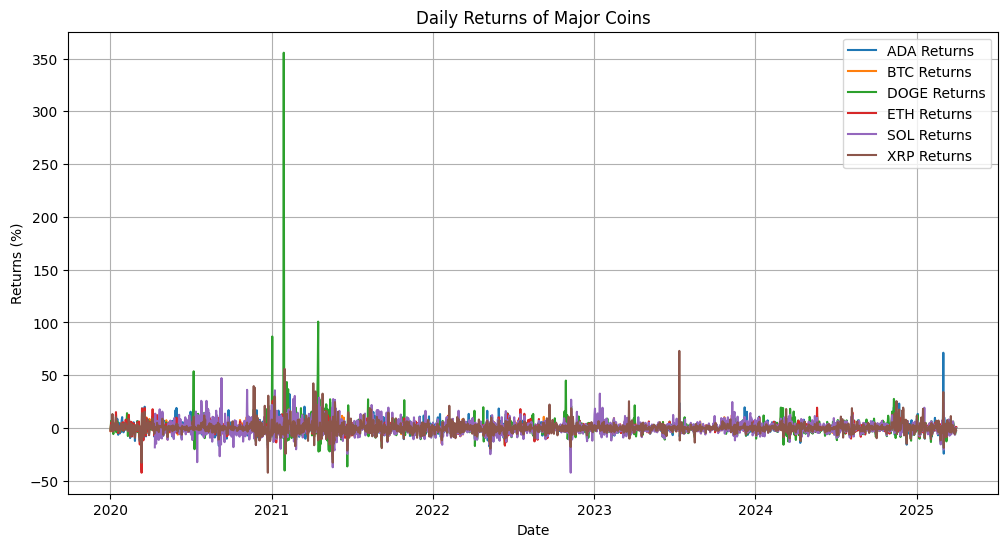

In [11]:
# Step 10: Visualize returns
plt.figure(figsize=(12, 6))
for coin in coins:
    plt.plot(df_subset.index, df_subset[f'returns_{coin}'], label=f'{coin.upper()} Returns')
plt.title('Daily Returns of Major Coins')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('major_coins_returns.png')
plt.close()